In [10]:
from train import *
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
import random
import scipy.ndimage
from input_pipe import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [11]:
class TrainConfig(object):
    """Training configuration"""
    dropout_keep_prob = 1.0
    model_name = 'cnn'  # choose model 
    model = staticmethod(globals()[model_name])
    config_name = 'no_hue'  # choose training run
    class_num=5

In [12]:
def predict(imgs, config):
    """Load most recent checkpoint, make predictions, compute saliency maps"""
    g = tf.Graph()
    with g.as_default():
        imgs_ph = tf.placeholder(dtype=tf.uint8, shape=(None, 150, 150, 3))
        logits = config.model(imgs_ph, config)
        top_pred = tf.reduce_max(logits, axis=1)
        #pred=tf.argmax(top_pred)
        top_k = tf.nn.top_k(logits, k=3, sorted=True)
        # can't calculate gradient to integer, get float32 version of image:
        #float_img = g.get_tensor_by_name('Cast:0')
        # calc gradient of top predicted class to image:
        #grads = tf.gradients(top_pred, float_img)
        #saver = tf.train.Saver()
        init_op=tf.global_variables_initializer()
        with tf.Session() as sess:
            sess.run(init_op)
            path = 'checkpoints/' + config.model_name + '/default/'
            #saver.restore(sess, tf.train.latest_checkpoint(path))
            saver = tf.train.import_meta_graph(path+'model-2000.meta')
            saver.restore(sess, tf.train.latest_checkpoint(path))

            #saver.restore(sess, tf.train.latest_checkpoint(path))
            feed_dict = {imgs_ph: imgs}
            #top_5_np, grads_np = sess.run([top_5, grads], feed_dict=feed_dict)
            top_k_np= sess.run([top_k], feed_dict=feed_dict)
      
    return top_k_np

#####879#####
{'0': 'daisy', '1': 'dandelion', '2': 'rose', '3': 'sunflower', '4': 'tulip'}


C:\Users\xieyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()


INFO:tensorflow:Restoring parameters from checkpoints/cnn/default/model-2000


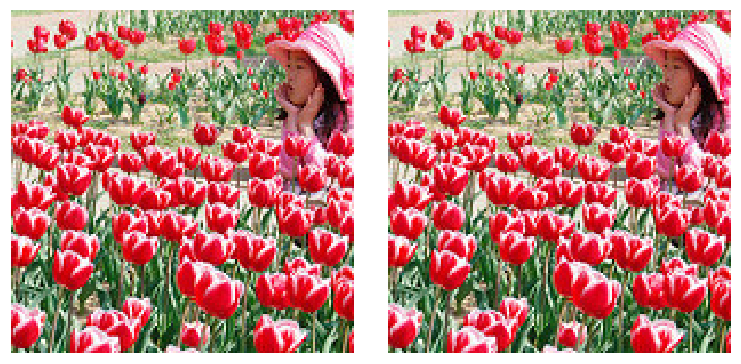

Actual label: tulip
predictions: tulip




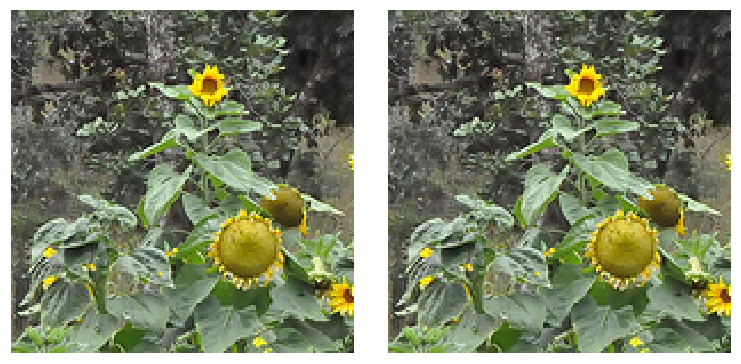

Actual label: sunflower
predictions: tulip




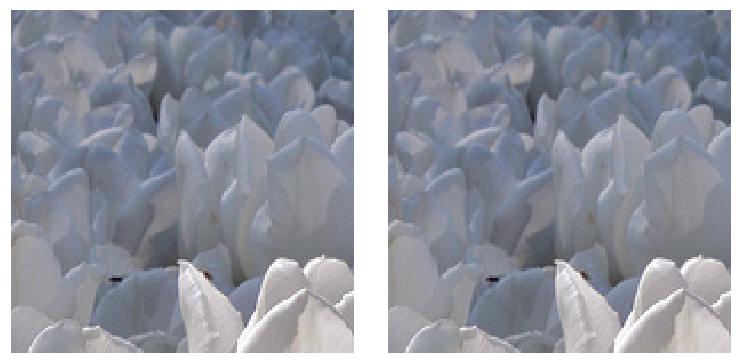

Actual label: tulip
predictions: tulip




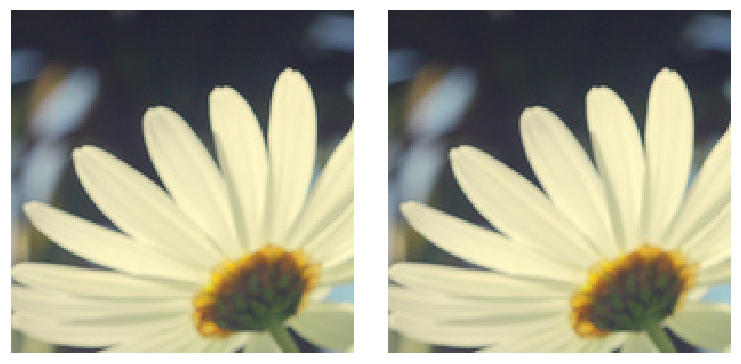

Actual label: daisy
predictions: tulip




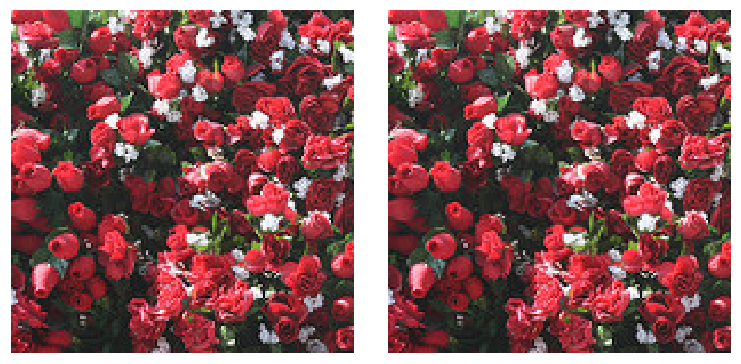

Actual label: rose
predictions: tulip




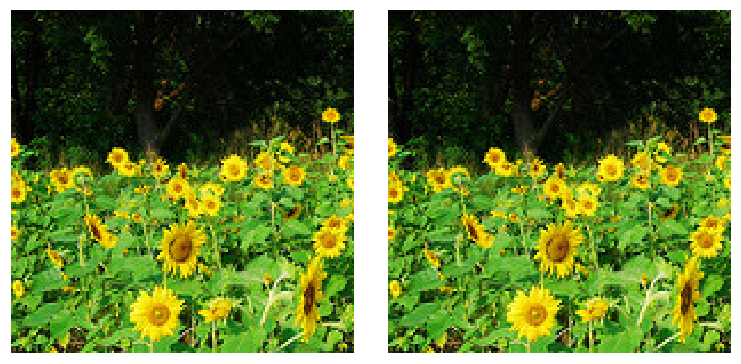

Actual label: sunflower
predictions: tulip




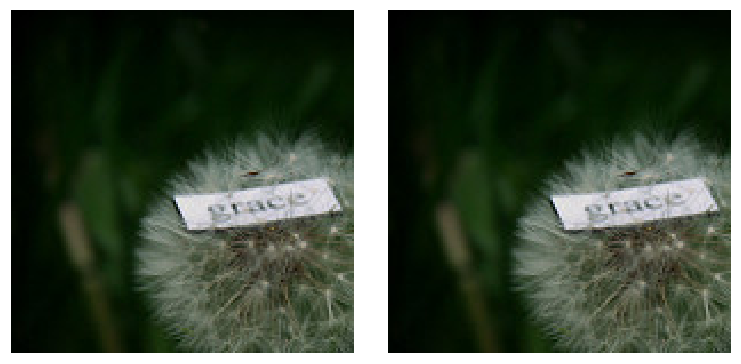

Actual label: dandelion
predictions: tulip




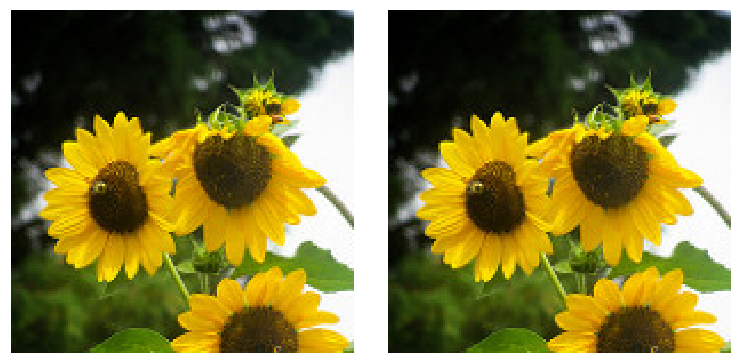

Actual label: sunflower
predictions: tulip




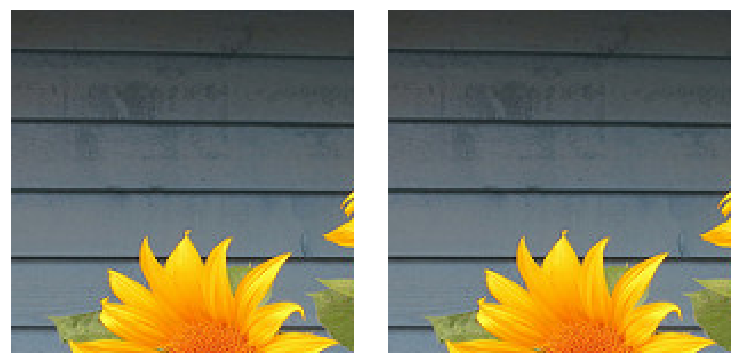

Actual label: sunflower
predictions: sunflower




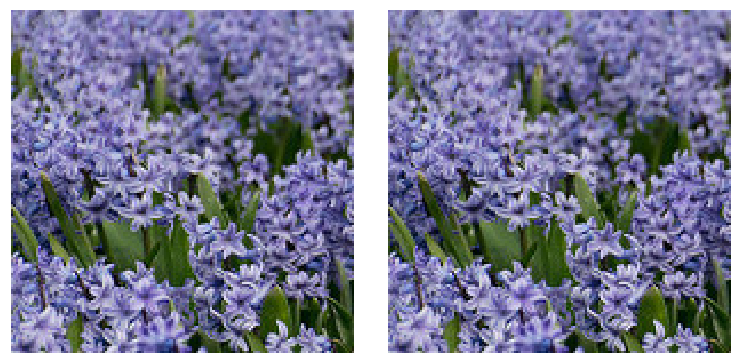

Actual label: tulip
predictions: sunflower




In [18]:
N = 10  # number of validation examples to view
label_dict,filenames_labels = build_filenames_labels('flowers','test')
i_to_label_dict={}
for k in label_dict.keys():
  i_to_label_dict[str(label_dict[k])]=k
print(i_to_label_dict)
pick_N = random.sample(filenames_labels, N)
imgs = np.zeros((N, 150, 150, 3), dtype=np.uint8)
labels = []
for i, filename_label in enumerate(pick_N):
    imgs[i, :, :, :] = scipy.ndimage.imread(filename_label[0], mode='RGB')[0:150,0:150,:]
    labels.append(i_to_label_dict[filename_label[1]])
    #labels.append(class_description[int(filename_label[1])])
#imgs = imgs[:, 4:60, 4:60, :]  # take center crop of images
config = TrainConfig()
top_k= predict(imgs, config)
#print(top_k)
top_k_index=top_k[0][1][:,0]

#top_k_l = top_k[1]  # 2nd element of list are class predictions
#sal_imgs = sal_imgs[0]  # 1st element of list are saliency maps
# root-sum-square RGB channels of generated saliency heat map
#sal_imgs = np.sqrt(np.sum(np.square(sal_imgs), axis=3))

for idx, filename in enumerate(pick_N):
    plt.subplot(121)
    plt.imshow(imgs[idx, :, :, :], interpolation='none')
    # next 5 lines get rid of all white space when saving .png
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 2)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplot(122)
    plt.imshow(imgs[idx, :, :], interpolation='none')
    # next 5 lines get rid of all white space when saving .png
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0.1)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    #plt.savefig('plots/pred_sal'+str(idx)+'.png', bbox_inches='tight',pad_inches=0.0, dpi=64)
    plt.show()
    print('Actual label: ' + labels[idx])
    
    #print(i_to_label_dict[str(top_5)])
    preds = i_to_label_dict[str(top_k_index[idx])]
    print('predictions: '+preds)
    #print(preds)
    print('\n')